# **Association Analysis** - **Frequent Item** set mining using **Apriori Algorithm** in Python

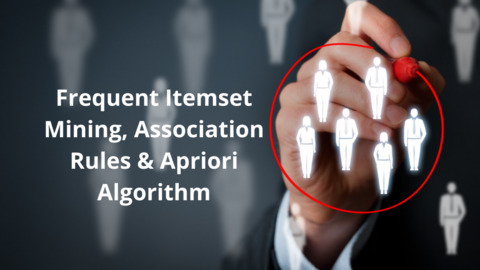

Apriori is an algorithm for frequent item set mining and **association rule learning** over relational databases.   

It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.   

The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.(*see Apriori Algorithm, Wikipedia 2019*)  


Links:  
* [Medium - Association Analysis in Python](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c)
* [Association Rule Mining Tutorial](http://www.pycaret.org/tutorials/html/ARUL101.html)
* [Association Rule Mining](https://sherbold.github.io/intro-to-data-science/exercises/Exercise_Association_Rule_Mining.html)
* [Kaggle - Association Rule Mining](https://www.kaggle.com/code/rfelizomni/association-rule-mining/notebook)
---  
Source:
+ [Morris Riedel](http://www.morrisriedel.de/on4off-demo-association-rule-mining-apriori-example)

History:  
- May 2022, V1 - dbe - initial version
- June 2023, V2 - dbe - minior corrections for BINA FS23
- May 2024, V3 - dbe - corrections and extensions for BINA FS24



#### Sources/Links
* [Medium - Association Analysis in Python](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c)
* [Association Rule Mining Tutorial](http://www.pycaret.org/tutorials/html/ARUL101.html)
* [Association Rule Mining](https://sherbold.github.io/intro-to-data-science/exercises/Exercise_Association_Rule_Mining.html)
* [Kaggle - Association Rule Mining](https://www.kaggle.com/code/rfelizomni/association-rule-mining/notebook)

---


## Setup Environment and Load Libraries

In [86]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Transaction Database (retail product basket dataset)

In [87]:
FILEpath = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB10-Associations%2BRecommenderSystem/Python/"
FILEname = "DATA_Retail_Dataset.csv"

df = pd.read_csv(FILEpath+FILEname, sep=',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Explore Transactions

In [88]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [89]:
items = (df['0'].unique())
items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

## Transform Transaction Dataset to a **One-hot Encoded** Dataset

In [90]:
# transform dataset to one-hot encoded dataset
encoded_items = []

def onehotencoding():
    for index, row in df.iterrows():
        present = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            present[uc] = 0
        for com in commons:
            present[com] = 1
        encoded_items.append(present)
onehotencoding()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
one_df = pd.DataFrame(encoded_items)

print(one_df)

     Bagel  Milk  Eggs  Cheese  Wine  Pencil  Diaper  Meat  Bread
0        0     0     1       1     1       1       1     1      1
1        0     1     0       1     1       1       1     1      1
2        0     1     1       1     1       0       0     1      0
3        0     1     1       1     1       0       0     1      0
4        0     0     0       0     1       1       0     1      0
..     ...   ...   ...     ...   ...     ...     ...   ...    ...
310      0     0     1       1     0       0       0     0      1
311      0     1     0       0     0       1       0     1      0
312      0     0     1       1     1       1       1     1      1
313      0     0     0       1     0       0       0     1      0
314      1     0     1       0     1       0       0     1      1

[315 rows x 9 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
one_df.sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bagel     134
Milk      158
Eggs      138
Cheese    158
Wine      138
Pencil    114
Diaper    128
Meat      150
Bread     159
dtype: int64

## Use **Apriori Algorithm** to compute **Frequent Item Sets**

In [105]:
# running apriori algorithm
freq_items = apriori(one_df, min_support=0.2, use_colnames=True)

freq_items.head(5)
# freq_items.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.501587,(Cheese)
4,0.438095,(Wine)


In [94]:
print(freq_items)

     support              itemsets
0   0.425397               (Bagel)
1   0.501587                (Milk)
2   0.438095                (Eggs)
3   0.501587              (Cheese)
4   0.438095                (Wine)
5   0.361905              (Pencil)
6   0.406349              (Diaper)
7   0.476190                (Meat)
8   0.504762               (Bread)
9   0.225397         (Bagel, Milk)
10  0.279365        (Bread, Bagel)
11  0.244444          (Eggs, Milk)
12  0.304762        (Cheese, Milk)
13  0.219048          (Wine, Milk)
14  0.244444          (Milk, Meat)
15  0.279365         (Bread, Milk)
16  0.298413        (Eggs, Cheese)
17  0.241270          (Eggs, Wine)
18  0.266667          (Eggs, Meat)
19  0.269841        (Cheese, Wine)
20  0.200000      (Pencil, Cheese)
21  0.200000      (Diaper, Cheese)
22  0.323810        (Cheese, Meat)
23  0.238095       (Bread, Cheese)
24  0.200000        (Pencil, Wine)
25  0.234921        (Diaper, Wine)
26  0.250794          (Wine, Meat)
27  0.244444        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Compute **Association Rules** from Frequent Item Sets

In [95]:
# using frequent itemsets from apriori for association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

rules.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
5,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
7,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
8,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429,0.410959
9,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655


In [97]:
rules.shape[0]
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         14 non-null     object 
 1   consequents         14 non-null     object 
 2   antecedent support  14 non-null     float64
 3   consequent support  14 non-null     float64
 4   support             14 non-null     float64
 5   confidence          14 non-null     float64
 6   lift                14 non-null     float64
 7   leverage            14 non-null     float64
 8   conviction          14 non-null     float64
 9   zhangs_metric       14 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extract **Left->Right Rule Parts** and Rule Metrics

In [96]:
support = rules['support']
confidence = rules['confidence']
lift = rules['lift']

print (rules[['support','confidence','lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support  confidence      lift
0   0.279365    0.656716  1.301042
1   0.304762    0.607595  1.211344
2   0.304762    0.607595  1.211344
3   0.298413    0.681159  1.358008
4   0.266667    0.608696  1.278261
5   0.269841    0.615942  1.227986
6   0.323810    0.645570  1.355696
7   0.323810    0.680000  1.355696
8   0.203175    0.666667  1.400000
9   0.203175    0.627451  1.250931
10  0.203175    0.831169  1.657077
11  0.215873    0.723404  1.519149
12  0.215873    0.809524  1.613924
13  0.215873    0.666667  1.521739


In [98]:
# extract Left->Right Rule parts as RULE_TXT for annotations in scatterplots
# type conversion for further string processing
rules['antecedents'] = rules['antecedents'].astype('str')
rules['consequents'] = rules['consequents'].astype('str')

# combine antecedent with consequent rula parts as [left}->{right} string
ante = []
cons = []
for i in range(0,rules.shape[0]-1):
  ante.append(rules["antecedents"].values[i])
  cons.append(rules["consequents"].values[i])

# clean left, right rule part strings
import re

pattern = r"[()]"
replacement = ""

rules_txt = []
for i in range(0,len(ante)):
  ante_txt = re.sub(pattern, replacement, ante[i])[9:]
  cons_txt = re.sub(pattern, replacement, cons[i])[9:]
  rules_txt.append(ante_txt+"->"+cons_txt)

print(rules_txt)

["{'Bagel'}->{'Bread'}", "{'Cheese'}->{'Milk'}", "{'Milk'}->{'Cheese'}", "{'Eggs'}->{'Cheese'}", "{'Eggs'}->{'Meat'}", "{'Wine'}->{'Cheese'}", "{'Cheese'}->{'Meat'}", "{'Meat'}->{'Cheese'}", "{'Cheese', 'Milk'}->{'Meat'}", "{'Cheese', 'Meat'}->{'Milk'}", "{'Milk', 'Meat'}->{'Cheese'}", "{'Eggs', 'Cheese'}->{'Meat'}", "{'Eggs', 'Meat'}->{'Cheese'}"]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Visualize Rule Metrics** as Scatterplot

In [99]:
# min-max normalization of the lift factor values for each rule to use as SIZE parameter in a scatterplot
normalized_lift=(rules['lift'] - min(rules['lift']))/(max(rules['lift']) - min(rules['lift']))

# print(normalized_lift)

0     0.201236
1     0.000000
2     0.000000
3     0.329039
4     0.150127
5     0.037335
6     0.323853
7     0.323853
8     0.423248
9     0.088812
10    1.000000
11    0.690559
12    0.903186
13    0.696370
Name: lift, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


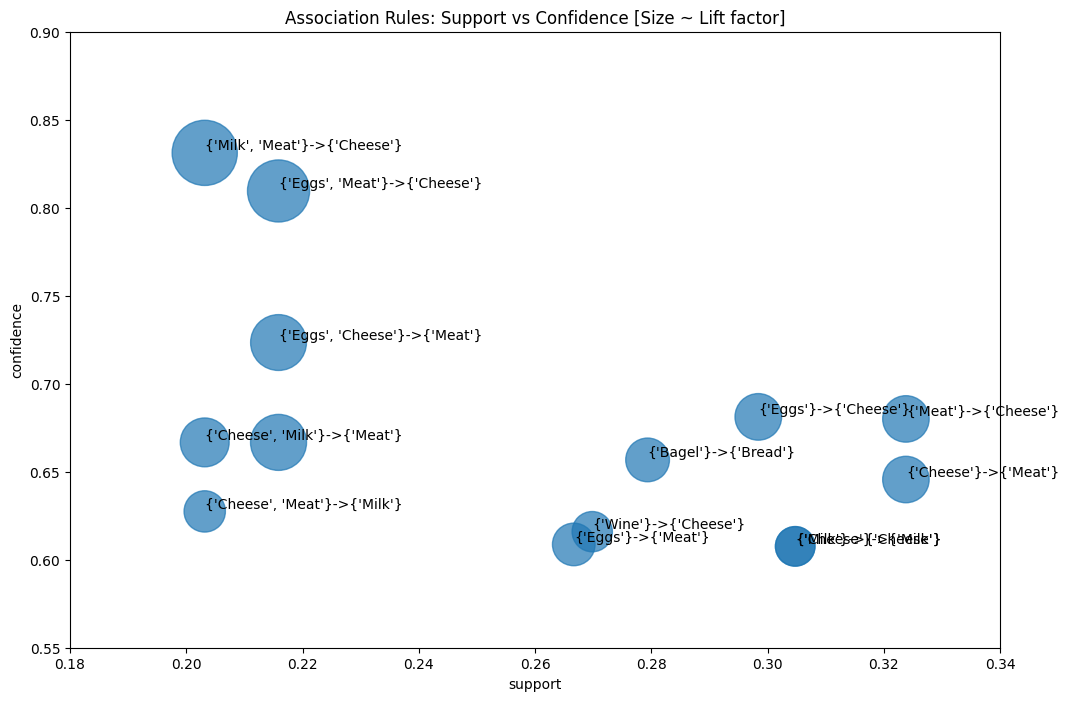

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x = rules['support']
y = rules['confidence']

size = np.exp(normalized_size+9)/10  # increase size to show differences of the

plt.scatter(x, y, s=size, alpha=0.7)

plt.xlabel('support')
plt.ylabel('confidence')

for i, txt in enumerate(ante):
  ax.text(x[i],y[i]+0.002,rules_txt[i])

plt.title('Association Rules: Support vs Confidence [Size ~ Lift factor]')
plt.xlim(0.18,0.34)
plt.ylim(0.55,0.9)

plt.show()